# 4.3 数値微分

In [1]:
# %cd /content/drive/MyDrive/work/
# !git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')
# %cd /content/drive/MyDrive/work/deep-learning-from-scratch/ch04/
# %cd /deep-learning-from-scratch

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import sys
import os
from pathlib import Path

# importディレクトリの追加
# sys.path.append(os.path.join(os.path.dirname(__file__), '..'))
sys.path.append(os.path.join(Path().resolve(), 'refs'))

print(sys.path)

['/home/jovyan/work/dl_study/01_deep-learning-from-scratch', '/opt/conda/lib/python38.zip', '/opt/conda/lib/python3.8', '/opt/conda/lib/python3.8/lib-dynload', '', '/opt/conda/lib/python3.8/site-packages', '/opt/conda/lib/python3.8/site-packages/IPython/extensions', '/home/jovyan/.ipython', '/home/jovyan/work/dl_study/01_deep-learning-from-scratch/refs']


## 4.3.1. 微分

- 微分は"ある瞬間"の変化の量を表したもの
- 10分間で2kmを走った場合なら
    - 直前の１分間に走った距離, 直前の1秒間, 直前の0.1秒間...  のようにある瞬間の変化の量(ある瞬間の速度)を得ることができる

- これは以下の式で表すことができる
$$
    \frac{d f(x)}{d x} = \lim_{h \to 0} \frac{ f(x + h) - f(x) }{h}
$$

- 左辺の$\frac{d f(x)}{d x}$は$f(x)$の$x$についての微分を表す記号
    - これは$x$に対する$f(x)$の変化の度合いとなる
    - 微分は **$x$の小さな変化によって, 関数$f(x)$の値がどれだけ変化するか**ということを意味する

- 微分する際に変化量である$h$を限りなく0に近づける
- これは$\lim_{h \to 0}$で表せる

### 関数の微分を求めるプログラムの実装

In [4]:
# 悪い微分の実装
def bad_numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

## 悪い実装の問題点

- 上記の実装には２つの問題点がある
    1. 変化量hに指定している数値(1e-50)が、小さすぎて誤差が発生する(**丸め誤差**)
    1. 関数fの差分を取る$f(x+h) - f(x)$で誤差が発生する(**計算誤差**)

### 問題点1

- 丸め誤差は小数の小さな範囲において数値が省略されてしまうこと
- 小さすぎる値を用いることはコンピュータで計算する上で問題となる
- 改善点としては**$ 10^{-4} $程度の値を用いれば良い結果が得られやすい**

### 問題点2

- 真の微分は$x$の位置での関数の傾き(接線)に対応する
- 今回の実装で行っている微分は$(x+h)$と$x$間の傾きに対応する
- 真の微分と今回の実装の値が厳密には一致しない
- この際は$h$を無限に0へと近づけることができないために生じる
- 数値微分(近似による接線)には誤差が含まれる
- 数値微分による誤差を減らす工夫として、$(x+h)$と$(x-h)$で, 関数$f$の差分を計算することが挙げられる
    - この差分は**$x$を中心としてその前後の差分を計算する**
    - このことから、**中心差分**と呼ばれる
    - $(x+h)と$$x$の差分により関数$f$の差分を計算する手法は**前方差分**と呼ばれる


![fig4-5](./images/fig4-5.jpg)

In [5]:
# 良い微分の実装
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

- 微小な差分によって微分を求めることは**数値微分**と呼ぶ
- 数式の展開によって微分を求めることは, **"解析的に微分を求める**と表現する
- 解析的な微分は, 誤差が含まれない**真の微分**として求めることができる


## 4.3.2 数値微分の例

次の二次関数を微分してみる
$$
    y = 0.01x^{2} + 0.1x
$$

In [6]:
def function_1(x):
    return .01*x**2 + .1*x

### $f(x) = 0.01x^{2} + 0.1x$のグラフ

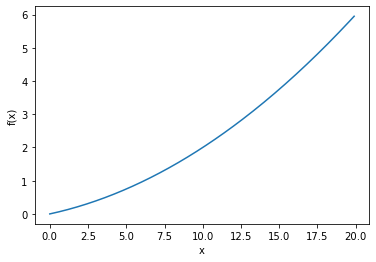

In [7]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

In [8]:
# 上の関数についてx=5, 10の時の微分計算

print(f'numerical_diff(function_1, 5): {numerical_diff(function_1, 5)}')
print(f'numerical_diff(function_1, 10): {numerical_diff(function_1, 10)}')

numerical_diff(function_1, 5): 0.1999999999990898
numerical_diff(function_1, 10): 0.2999999999986347


ここで計算した微分の値はxに対するf(x)の変化量であり, これは関数の傾きと対応する  
$f(x) = 0.01x^{2} + 0.1x$の解析的な解は$\frac{df(x)}{dx} = 0.02x + 0.1$となる  
このため$x=5, 10$での真の微分はそれぞれ, $0.2, 0.3$となるが  
上記の数値微分による結果では、**厳密な一致しないこと、その誤差は非常に小さいことがわかる**

0.1999999999990898


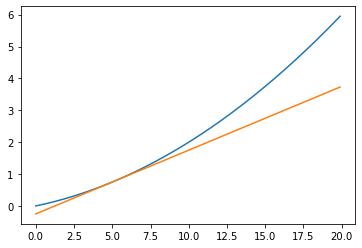

In [9]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 4.3.3 偏微分

次の,引数の二乗和を計算する式の微分を考える
$$
f(x_0, x_1) = x^{2}_0 + x^2_{1}
$$

In [10]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

### $f(x_0, x_1) = x^{2}_0 + x^2_{1}$のグラフ

偏微分はどの変数に対しての微分かということを区別する必要がある
つまり、この例ではx0, x1の２つある変数のどちらの変数に対しての微分を区別する  
複数の変数からなる、関数の微分を偏微分と呼ぶ  
偏微分は以下の数式で表す  
$$
    \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}
$$

In [11]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(f'numerical_diff(function_tmp1, 3.0): {numerical_diff(function_tmp1, 3.0)}')
print(f'numerical_diff(function_tmp2, 4.0): {numerical_diff(function_tmp2, 4.0)}')

numerical_diff(function_tmp1, 3.0): 6.00000000000378
numerical_diff(function_tmp2, 4.0): 7.999999999999119


変数が一つだけの関数を定義して、その関数について微分を求めている

問1の場合$x_1=4$で固定した新しい関数を定義してから
変数が$x_0$だけの関数に対して$x_0$だけの関数に対して数値微分を適用している

これは、解析的な微分の解とほぼ一致する

偏微分は１変数の微分と同じである場所の傾きを求める  
ただし偏微分の場合、複数ある変数の中でターゲットとする変数を一つにしぼり、**他の変数は定数として固定する**  
上の例では, ターゲットとする変数以外を特定の値に固定するために新しい関数を定義した  
そして, **新しく定義した関数に対して、これまで使用した数値微分の関数を適用して偏微分を求めた**

## 4.4 勾配

先の例では$x_0$と$x_1$の偏微分の計算を変数ごとに計算していた  
ここでは、$x_0$と$x_1$の偏微分を**まとめて計算する**

たとえば、$x_0=3$, $x_1=4$のとき, 両方の変数$(x_0, x_1)$についての偏微分$(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1})$を考える

<u>すべての変数の偏微分をベクトルとしてまとめたものを**勾配(gradient)**と呼ぶ</u>  
<u>勾配が示す方向は、**各場所において関数の値を最も減らす方向**となる</u>


In [12]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        #f(x-h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val    #値をもとに戻す

    return grad

In [13]:
print(f'numerical_gradient(function_2, np.array([3.0, 4.0])): {numerical_gradient(function_2, np.array([3.0, 4.0]))}')
print(f'numerical_gradient(function_2, np.array([0.0, 2.0])): {numerical_gradient(function_2, np.array([0.0, 2.0]))}')
print(f'numerical_gradient(function_2, np.array([3.0, 0.0])): {numerical_gradient(function_2, np.array([3.0, 0.0]))}')

numerical_gradient(function_2, np.array([3.0, 4.0])): [6. 8.]
numerical_gradient(function_2, np.array([0.0, 2.0])): [0. 4.]
numerical_gradient(function_2, np.array([3.0, 0.0])): [6. 0.]


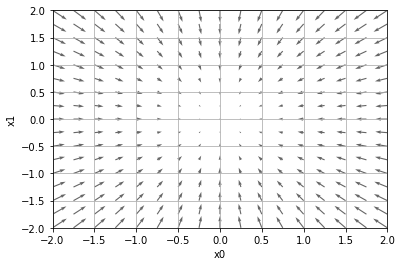

In [14]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

### 4.4.1 勾配法

- 機械学習問題の多くは、学習時に最適なパラメータ(重みとバイアス)を探索する
- NNも、上記と同様に最適なパラメータを学習時に見つけなければならない

- ここでの"最適なパラメータ"とは, **損失関数が最小値を取るときのパラメータ値**を指す
- 一般に損失関数は複雑かつ、パラメータ空間は広大となるため, 最小値を探索することは容易ではない
- 勾配法は各地点において、関数の値を最も減らす方向を示す
- 勾配が指す先が本当に関数の最小値なのかどうか、**その先が本当に進むべき方向なのかどうか保証することはできない**

#### 鞍点

- 関数の極小値や最小値などは鞍点(saddle point)と呼ばれ, 鞍点では勾配が0になる
- 極小値は局所的な最小値を示す
- 勾配法は勾配が0の場所を探索するが, その場所が必ずしも最小値であるとは限らない
- 関数が複雑で歪な形をしている場合は, プラトーと呼ばれる学習が進まない停滞期に陥ることがある

- 複雑な関数においては,**勾配が指す方向は最小値でない場合がほとんど**
- 勾配が必ず最小値を指すとは限らないが, その方向に進むことで関数の値を最も減らすことができる

- 勾配法は現在の場所から勾配方向に**一定の距離だけ進む**  
  さらに**移動した先でも同様に勾配を求めて, またその勾配方向へ進むという事を繰り返す**
  
- 勾配方向へ進むことを繰り返すことで, 関数の値を徐々に減らすことを**勾配法(gradient method)**と呼ぶ

- 勾配法は機械学習の最適化問題で使用されることが多く, NNの学習では勾配法がよく使用される

- 勾配法は以下の式で表すことができる

$$
    x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}, 
    x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

#### 学習率

- 上記における$\eta$は更新の量を表し, NNの学習においては**学習率(learning rate)**と呼ぶ
- LRは1回の学習で, どれだけパラメータを更新するかということを決める
- 上記の式は一回の更新式を示しており, 学習ではこれを繰り返し行う
    - つまりステップ毎に変数の値を更新していき, それを繰り返すことで徐々に関数の値を減らす
    - 上記例では、変数が2つの場合を示しているが, さらに変数の数が増えても同じような式で更新できる
    
- 学習率の値は0.01や0.001など前もって決めておく必要がある

- 学習率は、一般的に大きすぎても, 小さすぎても良くない
  - 学習率が大きすぎると: **大きな値に発散してしまう**
  - 学習率が小さすぎると: **パラメータがほとんど更新されない**

In [15]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

def function_2(x):
    return x[0]**2 + x[1]**2

In [16]:
# 学習率が適切な例の勾配法
init_x = np.array([-3.0, 4.0])
print(f'gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100): {gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)}')

gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100): [-6.11110793e-10  8.14814391e-10]


疑問メモ
- plotの個数は100個あるの?

In [17]:
# 学習率が適切な例の勾配法

print(f'gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100): \
      {gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)}')

print(f'gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100): \
      {gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)}')

gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100):       [ 2.34235971e+12 -3.96091057e+12]
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100):       [ 2.34235971e+12 -3.96091057e+12]


### 4.4.2 ニューラルネットワークに対する勾配

- NNの学習においても勾配を求める必要がある
    - ここでの勾配は重みパラメータに対する損失関数の勾配

- 形状が2\*3の重み$W$を持つNNがあり、損失関数を$L$で表す場合  
勾配$\frac{\partial L}{\partial W}$は以下の式で表す

$$
W =\begin{pmatrix}
        \ w_{11} & w_{12} & w_{13} \\
        \ w_{21} & w_{22} & w_{23}
    \end{pmatrix}
$$

$$
\frac{\partial L}{\partial W} = \begin{pmatrix}
     \ \frac{\partial L}{w_{11}} & \frac{\partial L}{w_{12}} & \frac{\partial L}{w_{13}} \\
     \ \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}}
\end{pmatrix}
$$


- 勾配$\frac{\partial L}{\partial W}$の各要素はそれぞれの要素に関する偏微分から構成される

- **勾配$\frac{\partial L}{\partial W}$の形状は重み$W$の形状と同じになる**
    



## 4.5 学習アルゴリズムの実装

- NNは適用可能な重みとバイアスをもちこの重みとバイアスを訓練データに適応するように調整することを*学習*と呼ぶ
- NNの学習学習アルゴリズムは以下の順序で実行される
    1. **ミニバッチ選択**
    1. **勾配算出**
    1. **重みパラメータを更新**
    1. **1～3を繰り返す**
    
- 上記の手法を**"確率的勾配降下法(Stochastic Gradient Descent)"**と呼ぶ

### 4.5.1. 2層ニューラルネットワークのクラス

- 初期化メソッド __init__()では, 重みパラメータの初期化を行う

- 重みパラメータの初期値には様々な初期化手法がある
    - ref. https://ai-trend.jp/basic-study/neural-network/initial_value/

In [18]:
# coding: utf-8
import numpy as np

def _numerical_gradient_1d(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient_2d(f, X):
    if X.ndim == 1:
        return _numerical_gradient_1d(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_1d(f, x)
        
        return grad


def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    print(f'{x.shape}')
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        # print(f'it.multi_index: {it.multi_index}')
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()
        
    return grad

In [19]:
import sys, os
import logging
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 重みの初期化(重みは乱数, バイアスは0で初期化)
        self.params = {}
        self.params['W1'] = weight_init_std + np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    # 推論処理(foward)
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
                
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        logging.debug(f'pred(): x: {x}')
        logging.debug(f'pred(): -> y {y}')
        
        return y
        
    # 損失関数(x: 入力データ, t: 教師データ)
    def loss(self, x, t):
        y = self.predict(x)
        
        # 推論結果と教師データのクロスエントロピーで損失計算
        l = cross_entropy_error(y, t)
        logging.debug(f'loss(): loss: {l}')
        
        return l
    
    # 正解率計算
    def accuracy(self, x, t):
        y = self.predict(x)
        
        # yベクトルについて, 最大となるものを取る
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        # 教師データと一致している推論結果を算出
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_grad(self, x, t):
        loss_W = lambda W: self.loss(x, t)
                
        grads = {}  # 勾配
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        print(f'W1 grads: {W1}')
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        print(f'b1 grads: {b1}')
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        print(f'W1 grads: {W2}')
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        print(f'b2 grads: {b2}')
        
        return grads

## 4.5.2 ミニバッチ学習の実装

In [22]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet
import tqdm

logger = logging.getLogger("LogTest")
logger.setLevel(logging.DEBUG)

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# パラメータを更新する回数(=イテレーション数)
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in tqdm.tqdm(range(iters_num)):  
    # get mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # clacurate gradient
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)  # 高速版
    
    # update params
    for key in ('W1', 'b1', 'W2', 'b2'):
        # 勾配の要素を参照し, その分をパラメータから減算
        network.params[key] -= learning_rate * grad[key]
        
    # 学習経過の記録
    loss = network.loss(x_batch, t_batch)
    logging.debug(f'loss: {loss}')
    
    train_loss_list.append(loss)

  0%|          | 1/10000 [00:23<65:07:50, 23.45s/it]


KeyboardInterrupt: 

## 4.5.3 テストデータで評価

### エポック(epoch)
- エポックとは学習において、**訓練データを全て使い切る回数**
- 10, 000個の訓練データに対して, 100個のミニバッチで学習する場合
- ** SGDを100回繰り返したら, 全ての訓練データを見たことになる(100回 * 100batch = 10,000個) **
 
- 1epoch毎に認識精度を計算する理由は, 時間を短くするため
    - おおきな視点でざっくりと認識精度が推定できればよい

In [23]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet
import tqdm

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_size = x_train.shape[0]

# ハイパラ
iters_num = 10000
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in tqdm.tqdm(range(iters_num)):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 高速版
    
    # パラメータの更新(それぞれのモデルのパラメータから LRをかけた勾配を引く)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1エポック毎に認識精度を計算
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f'train acc: {train_acc}, test acc: {test_acc}')        

  2%|▏         | 166/10000 [00:00<14:26, 11.34it/s]

train acc: 0.09751666666666667, test acc: 0.0974


  7%|▋         | 728/10000 [00:00<03:23, 45.56it/s]

train acc: 0.7768333333333334, test acc: 0.7852


 14%|█▎        | 1352/10000 [00:01<00:39, 217.08it/s]

train acc: 0.8807166666666667, test acc: 0.8851


 20%|█▉        | 1978/10000 [00:02<00:13, 592.50it/s]

train acc: 0.9005333333333333, test acc: 0.9026


 26%|██▌       | 2603/10000 [00:02<00:08, 833.82it/s]

train acc: 0.90855, test acc: 0.9128


 32%|███▏      | 3228/10000 [00:03<00:07, 896.00it/s] 

train acc: 0.9148833333333334, test acc: 0.9194


 37%|███▋      | 3728/10000 [00:03<00:07, 890.20it/s] 

train acc: 0.9206166666666666, test acc: 0.924


 43%|████▎     | 4348/10000 [00:04<00:06, 903.04it/s] 

train acc: 0.9242333333333334, test acc: 0.9273


 50%|████▉     | 4973/10000 [00:05<00:05, 908.98it/s] 

train acc: 0.9267333333333333, test acc: 0.9286


 56%|█████▌    | 5598/10000 [00:05<00:04, 909.84it/s] 

train acc: 0.9305833333333333, test acc: 0.9322


 62%|██████▏   | 6224/10000 [00:06<00:04, 909.29it/s] 

train acc: 0.93255, test acc: 0.9339


 67%|██████▋   | 6728/10000 [00:06<00:03, 900.93it/s] 

train acc: 0.9366333333333333, test acc: 0.936


 74%|███████▎  | 7353/10000 [00:07<00:02, 907.06it/s] 

train acc: 0.9386333333333333, test acc: 0.937


 80%|███████▉  | 7979/10000 [00:08<00:02, 910.31it/s] 

train acc: 0.9406833333333333, test acc: 0.9395


 86%|████████▌ | 8605/10000 [00:08<00:01, 908.98it/s] 

train acc: 0.9433166666666667, test acc: 0.9418


 92%|█████████▏| 9232/10000 [00:09<00:00, 910.13it/s] 

train acc: 0.9459666666666666, test acc: 0.9433


 97%|█████████▋| 9728/10000 [00:10<00:00, 887.87it/s] 

train acc: 0.9473, test acc: 0.9464


100%|██████████| 10000/10000 [00:10<00:00, 973.10it/s]


### 学習曲線

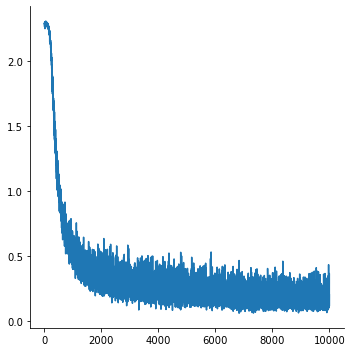

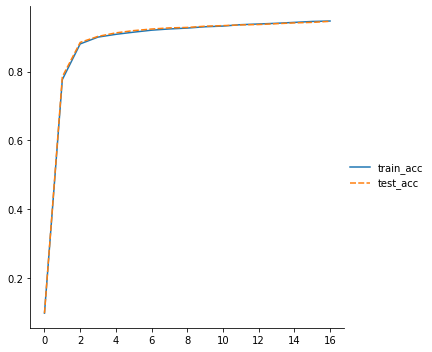

In [24]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'train_acc': train_acc_list, 'test_acc': test_acc_list})

p1 = sns.relplot(data=train_loss_list, kind='line')
p2 = sns.relplot(data=df, kind='line')

## 4.6 まとめ

- MLで使用するデータセットは訓練データとテストデータに分けて使用する
- 訓練データで学習を行い, 学習したモデルの汎化能力をテストデータで評価する
- NNの学習は<u>損失関数を指標として</u>, **損失関数の値が小さくなるように重みパラメータを更新する**
- 重みパラメータを更新は<u>重みパラメータの勾配を利用し</u>, **勾配方向に重みの値を更新する作業を繰り返す**
    - **勾配は各パラメータ毎の損失関数に対する偏微分の結果をまとめたもの**
    

- 微小な値を与えたとき差分によって微分を求めることを**数値微分**と呼ぶ

- 数値微分によって、重みパラメータの勾配を求めることができる
- 数値微分による計算には時間がかかるが, **実装は簡単**
- 第5章で紹介される, **誤差逆伝播法は高速に勾配を求めることができる**